# NW Data

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from sklearn import preprocessing
from sklearn.preprocessing import normalize

## 1) Data loading

In [138]:
train_df = pd.read_csv("data/UNSW_NB15_training-set.csv") 

In [139]:
train_df.shape

(82332, 45)

In [140]:
train_y = train_df['label']
train_y_df = train_y.reset_index()
cnt_y = train_y_df.label.value_counts().reset_index()
cnt_y.columns = ['Class', 'Count']
total_y = cnt_y.Count.sum()
cnt_y["Percentage"] =(cnt_y.Count/total_y)*100
cnt_y

,Class,Count,Percentage
0,1,45332,55.060001
1,0,37000,44.939999


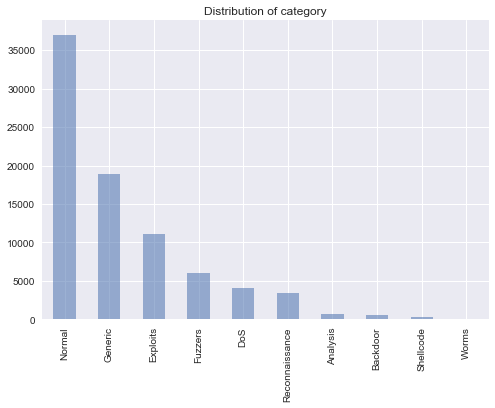

In [141]:
alpha_bar_chart = 0.55
train_df['attack_cat'].value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# puts a title on our graph
plt.title("Distribution of category")  

## Classification

In [142]:
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [143]:
y = train_df.label.values

In [144]:
train = train_df.drop(['label','attack_cat','id'],axis=1)

In [145]:
for attribute in ["proto","service","state"]:
    le_attribute = preprocessing.LabelEncoder()   
    train[attribute] = le_attribute.fit_transform(train[attribute])
X = train.as_matrix()

In [146]:
#X_data = pd.get_dummies(train).values  # one-hot encoding. change category value to numberica value matrix

In [147]:
#X = X_data[:train.shape[0]]  

## train a classfiier

In [148]:
from sklearn import metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
n_folds = 5
kf = model_selection.StratifiedKFold(n_splits=n_folds, random_state=1, shuffle=True)
fold = 0
#target_names = {'class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9'}
for train_index, test_index in kf.split(X, y):
    fold += 1
    X_train, X_valid    = X[train_index], X[test_index]
    y_train, y_valid    = y[train_index], y[test_index]
    
    print("Fold", fold, X_train.shape, X_valid.shape)
    
    clf = LogisticRegression(C=3)
    clf.fit(X_train, y_train)
    p_train = clf.predict_proba(X_train)
    p_valid = clf.predict_proba(X_valid)
        
    y_predict_train = clf.predict(X_train)
    y_predict_valid = clf.predict(X_valid)
    

    print(metrics.log_loss(y_train, p_train))
    print(metrics.log_loss(y_valid, p_valid))
    print(classification_report(y_valid, y_predict_valid))
    

Fold 1 (65865, 42) (16467, 42)
0.529116660648
0.527667413931
             precision    recall  f1-score   support

          0       0.67      0.88      0.76      7400
          1       0.87      0.65      0.74      9067

avg / total       0.78      0.75      0.75     16467

Fold 2 (65865, 42) (16467, 42)
0.528194933479
0.51759742656
             precision    recall  f1-score   support

          0       0.68      0.87      0.76      7400
          1       0.86      0.67      0.75      9067

avg / total       0.78      0.76      0.76     16467

Fold 3 (65866, 42) (16466, 42)
0.527851299815
0.529765003826
             precision    recall  f1-score   support

          0       0.68      0.87      0.76      7400
          1       0.86      0.66      0.75      9066

avg / total       0.78      0.75      0.75     16466

Fold 4 (65866, 42) (16466, 42)
0.52655129189
0.534116248486
             precision    recall  f1-score   support

          0       0.68      0.86      0.76      7400
      

In [149]:
from sklearn.preprocessing import normalize

from sklearn.linear_model import SGDClassifier
n_folds = 5
kf = model_selection.StratifiedKFold(n_splits=n_folds, random_state=1, shuffle=True)
fold = 0
#target_names = {'class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9'}
for train_index, test_index in kf.split(X, y):
    fold += 1
    X_train, X_valid    = X[train_index], X[test_index]
    y_train, y_valid    = y[train_index], y[test_index]
    
    print("Fold", fold, X_train.shape, X_valid.shape)
    
    clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=   5, random_state=42)
    clf.fit(X_train, y_train)
    
        
    y_predict_train = clf.predict(X_train)
    y_predict_valid = clf.predict(X_valid)
    

    #print(metrics.log_loss(y_train, p_train))
    #print(metrics.log_loss(y_valid, p_valid))
    print('SVM correct prediction: {:4.2f}'.format(np.mean(y_predict_valid == y_valid)))

Fold 1 (65865, 42) (16467, 42)
SVM correct prediction: 0.67
Fold 2 (65865, 42) (16467, 42)
SVM correct prediction: 0.63
Fold 3 (65866, 42) (16466, 42)
SVM correct prediction: 0.45
Fold 4 (65866, 42) (16466, 42)
SVM correct prediction: 0.71
Fold 5 (65866, 42) (16466, 42)
SVM correct prediction: 0.75


In [150]:
from sklearn.preprocessing import normalize
X = preprocessing.normalize(X, norm='l2')

from sklearn.linear_model import SGDClassifier
n_folds = 5
kf = model_selection.StratifiedKFold(n_splits=n_folds, random_state=1, shuffle=True)
fold = 0
#target_names = {'class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9'}
for train_index, test_index in kf.split(X, y):
    fold += 1
    X_train, X_valid    = X[train_index], X[test_index]
    y_train, y_valid    = y[train_index], y[test_index]
    
    print("Fold", fold, X_train.shape, X_valid.shape)
    
    clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=   5, random_state=42)
    clf.fit(X_train, y_train)
    
        
    y_predict_train = clf.predict(X_train)
    y_predict_valid = clf.predict(X_valid)
    

    #print(metrics.log_loss(y_train, p_train))
    #print(metrics.log_loss(y_valid, p_valid))
    print('SVM correct prediction: {:4.2f}'.format(np.mean(y_predict_valid == y_valid)))

Fold 1 (65865, 42) (16467, 42)
SVM correct prediction: 0.75
Fold 2 (65865, 42) (16467, 42)
SVM correct prediction: 0.76
Fold 3 (65866, 42) (16466, 42)
SVM correct prediction: 0.75
Fold 4 (65866, 42) (16466, 42)
SVM correct prediction: 0.75
Fold 5 (65866, 42) (16466, 42)
SVM correct prediction: 0.75


In [151]:
from sklearn.naive_bayes import MultinomialNB
n_folds = 5
kf = model_selection.StratifiedKFold(n_splits=n_folds, random_state=1, shuffle=True)
fold = 0
#target_names = {'class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9'}
for train_index, test_index in kf.split(X, y):
    fold += 1
    X_train, X_valid    = X[train_index], X[test_index]
    y_train, y_valid    = y[train_index], y[test_index]
    
    print("Fold", fold, X_train.shape, X_valid.shape)
    
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    p_train = clf.predict_proba(X_train)
    p_valid = clf.predict_proba(X_valid)
        
    y_predict_train = clf.predict(X_train)
    y_predict_valid = clf.predict(X_valid)
    

    #print(metrics.log_loss(y_train, p_train))
    #print(metrics.log_loss(y_valid, p_valid))
    print(np.mean(y_predict_valid == y_valid))   
    #print(classification_report(y_valid, y_predict_valid))
    

Fold 1 (65865, 42) (16467, 42)
0.750045545637
Fold 2 (65865, 42) (16467, 42)
0.757697212607
Fold 3 (65866, 42) (16466, 42)
0.752581076157
Fold 4 (65866, 42) (16466, 42)
0.752520344953
Fold 5 (65866, 42) (16466, 42)
0.752945463379


In [153]:
from sklearn import svm
n_folds = 5
kf = model_selection.StratifiedKFold(n_splits=n_folds, random_state=1, shuffle=True)
fold = 0
#target_names = {'class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9'}
for train_index, test_index in kf.split(X, y):
    fold += 1
    X_train, X_valid    = X[train_index], X[test_index]
    y_train, y_valid    = y[train_index], y[test_index]
    
    print("Fold", fold, X_train.shape, X_valid.shape)
    
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
    p_train = clf.predict_proba(X_train)
    p_valid = clf.predict_proba(X_valid)
        
    y_predict_train = clf.predict(X_train)
    y_predict_valid = clf.predict(X_valid)
    

    #print(metrics.log_loss(y_train, p_train))
    #print(metrics.log_loss(y_valid, p_valid))
    print(np.mean(y_predict_valid == y_valid))   
    #print(classification_report(y_valid, y_predict_valid))
    

Fold 1 (65865, 42) (16467, 42)


AttributeError: predict_proba is not available when  probability=False